# WORKING DOC

### Import Libraries and Dependencies

In [107]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [108]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [109]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [110]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['LINK/AUD']['symbol']
# crypto_details

'LINK/AUD'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [111]:
# Fetch daily candlestick bar data from `LINK/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620572400000, 49.86212, 51.80152, 49.79133, 51.80152, 2582.09691821]

In [112]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1620565200000,48.15448,48.81072,48.15448,48.81072,834.732460
1,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680
2,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918
3,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910
4,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726


'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [113]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1620565200000,48.15448,48.81072,48.15448,48.81072,834.732460,2021-05-09 13:00:00
1,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680,2021-05-09 14:00:00
2,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918,2021-05-09 15:00:00
3,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910,2021-05-09 16:00:00
4,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726,2021-05-09 17:00:00


'_________________________'

'historical_prices_df shape: (720, 7)'

In [114]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

,timestamp,open,high,low,close,volume,date
date,,,,,,,
2021-05-09 13:00:00,1620565200000,48.15448,48.81072,48.15448,48.81072,834.732460,2021-05-09 13:00:00
2021-05-09 14:00:00,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680,2021-05-09 14:00:00
2021-05-09 15:00:00,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918,2021-05-09 15:00:00
2021-05-09 16:00:00,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910,2021-05-09 16:00:00
2021-05-09 17:00:00,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726,2021-05-09 17:00:00
...,...,...,...,...,...,...,...
2021-06-08 08:00:00,1623139200000,24.08000,24.55486,24.08000,24.20431,1343.862639,2021-06-08 08:00:00
2021-06-08 09:00:00,1623142800000,24.20431,24.20431,23.70598,23.71481,928.390683,2021-06-08 09:00:00
2021-06-08 10:00:00,1623146400000,23.75040,24.06341,23.70598,23.71981,3209.515523,2021-06-08 10:00:00


### Plot Daily Returns

In [115]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

,timestamp,open,high,low,close,volume,date,daily_return
date,,,,,,,,
2021-05-09 14:00:00,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680,2021-05-09 14:00:00,0.022596
2021-05-09 15:00:00,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918,2021-05-09 15:00:00,0.037823
2021-05-09 16:00:00,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910,2021-05-09 16:00:00,-0.017429
2021-05-09 17:00:00,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726,2021-05-09 17:00:00,-0.005901
2021-05-09 18:00:00,1620583200000,50.65753,51.30955,50.42594,50.88990,1794.841976,2021-05-09 18:00:00,0.005762
...,...,...,...,...,...,...,...,...
2021-06-08 08:00:00,1623139200000,24.08000,24.55486,24.08000,24.20431,1343.862639,2021-06-08 08:00:00,0.005115
2021-06-08 09:00:00,1623142800000,24.20431,24.20431,23.70598,23.71481,928.390683,2021-06-08 09:00:00,-0.020224
2021-06-08 10:00:00,1623146400000,23.75040,24.06341,23.70598,23.71981,3209.515523,2021-06-08 10:00:00,0.000211


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [116]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
date,,,,,,,,,,,,,,,,,,
2021-05-09 14:00:00,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680,2021-05-09 14:00:00,0.022596,49.913650,49.913650,49.913650,49.913650,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-09 15:00:00,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918,2021-05-09 15:00:00,0.037823,50.893916,50.873941,50.864128,50.859221,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-09 16:00:00,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910,2021-05-09 16:00:00,-0.017429,50.895632,50.882478,50.875809,50.872423,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-09 17:00:00,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726,2021-05-09 17:00:00,-0.005901,50.812518,50.807712,50.804995,50.803548,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-09 18:00:00,1620583200000,50.65753,51.30955,50.42594,50.88990,1794.841976,2021-05-09 18:00:00,0.005762,50.830465,50.825308,50.822450,50.820938,1.0,0.0,1.0,1.0,0.0,1.0


In [117]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:xlabel='date'>

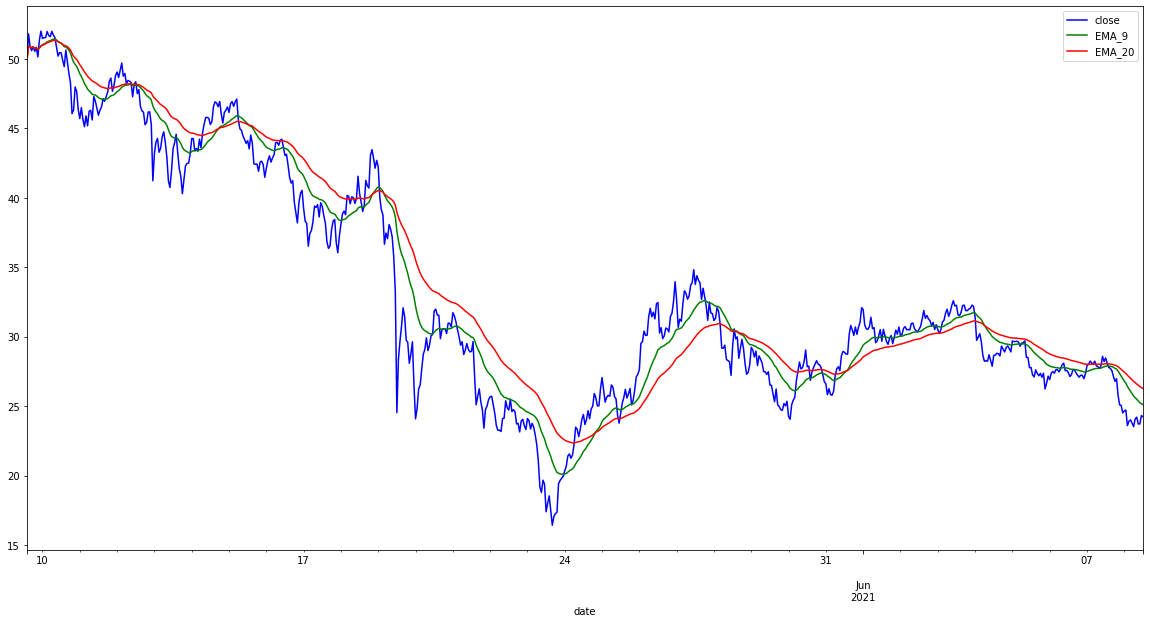

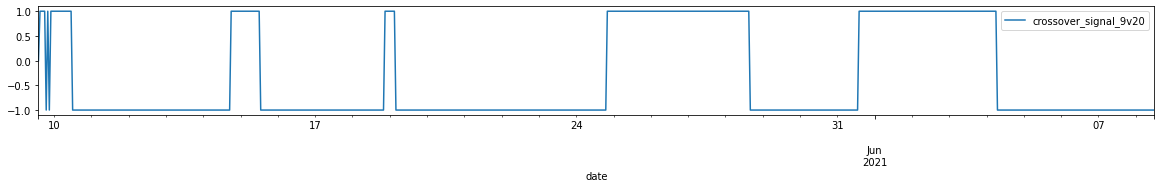

In [176]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])
historical_prices_df[['crossover_signal_9v20']].plot(figsize=(20,2))

In [119]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

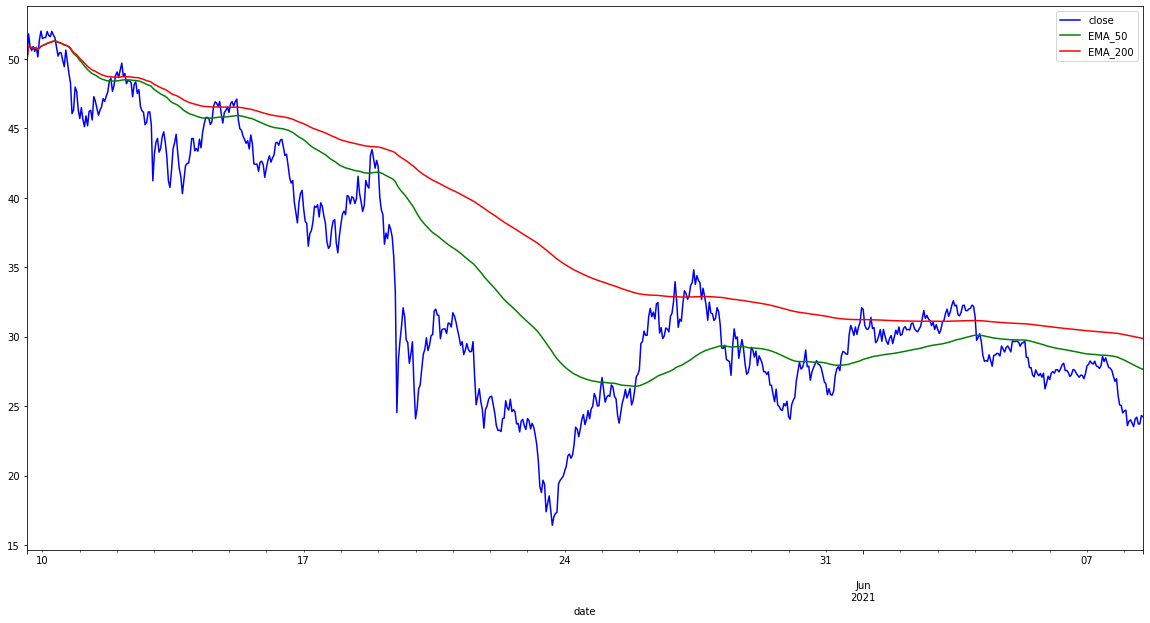

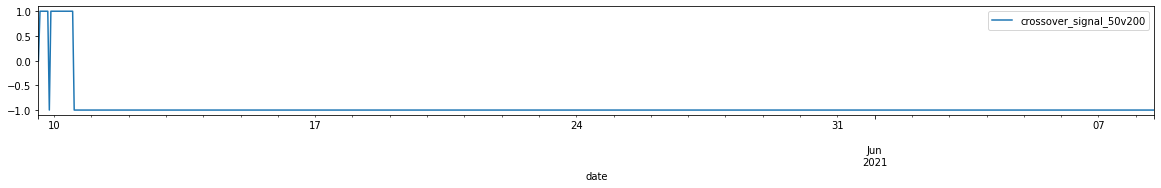

In [179]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])
historical_prices_df[['crossover_signal_50v200']].plot(figsize=(20,2))

<AxesSubplot:xlabel='date'>

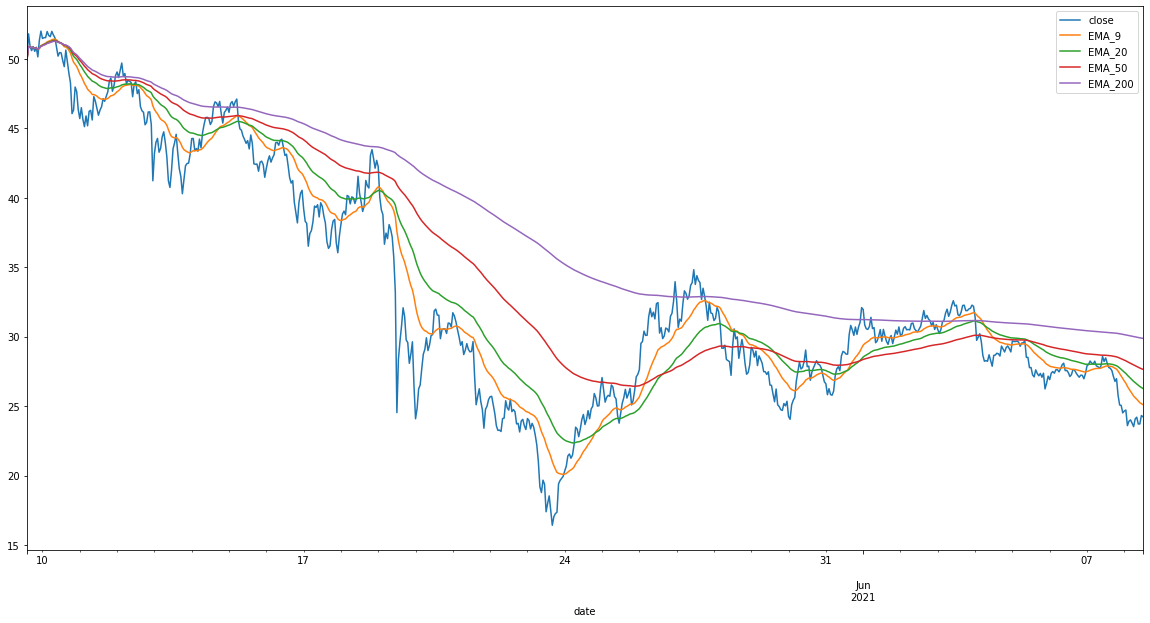

In [121]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [122]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-11 16:00:00,1620748800000,47.48667,47.74007,46.74607,46.94687,1265.477368,2021-05-11 16:00:00,-0.003972,47.090777,47.903275,...,0.0,-1.0,-1.0,46.385098,0.772030,47.157128,45.613068,0.0,0.0,0.0
2021-05-11 17:00:00,1620752400000,46.92590,47.31392,46.89973,47.30236,240.835894,2021-05-11 17:00:00,0.007572,47.106752,47.878763,...,0.0,-1.0,-1.0,46.351459,0.711378,47.062837,45.640082,0.0,-1.0,-1.0
2021-05-11 18:00:00,1620756000000,47.28713,47.68971,47.28713,47.62206,475.986052,2021-05-11 18:00:00,0.006759,47.145605,47.868361,...,0.0,-1.0,-1.0,46.350115,0.708817,47.058932,45.641298,0.0,-1.0,-1.0
2021-05-11 19:00:00,1620759600000,47.66501,48.38680,47.66501,48.38680,2348.696724,2021-05-11 19:00:00,0.016059,47.239069,47.889233,...,0.0,-1.0,-1.0,46.452499,0.842438,47.294936,45.610061,0.0,-1.0,-1.0
2021-05-11 20:00:00,1620763200000,48.32021,48.64818,48.00315,48.61872,753.104233,2021-05-11 20:00:00,0.004793,47.342837,47.918421,...,0.0,-1.0,-1.0,46.598261,0.951200,47.549462,45.647061,0.0,-1.0,-1.0
2021-05-11 21:00:00,1620766800000,48.65911,48.65911,47.58793,47.66812,624.742964,2021-05-11 21:00:00,-0.019552,47.367276,47.908465,...,0.0,-1.0,-1.0,46.657219,0.980171,47.637390,45.677048,0.0,-1.0,-1.0
2021-05-11 22:00:00,1620770400000,47.82394,48.07519,47.68153,48.07519,77.056121,2021-05-11 22:00:00,0.008540,47.420410,47.915059,...,0.0,-1.0,-1.0,46.778796,0.998464,47.777260,45.780333,0.0,-1.0,-1.0
2021-05-11 23:00:00,1620774000000,48.13309,48.80319,48.13309,48.80319,322.137117,2021-05-11 23:00:00,0.015143,47.524099,47.949992,...,0.0,-1.0,-1.0,46.962913,1.016007,47.978920,45.946905,0.0,-1.0,-1.0
2021-05-12 00:00:00,1620777600000,48.60000,49.32194,48.60000,49.05706,186.145103,2021-05-12 00:00:00,0.005202,47.638951,47.993308,...,0.0,-1.0,-1.0,47.120914,1.084901,48.205815,46.036013,0.0,-1.0,-1.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

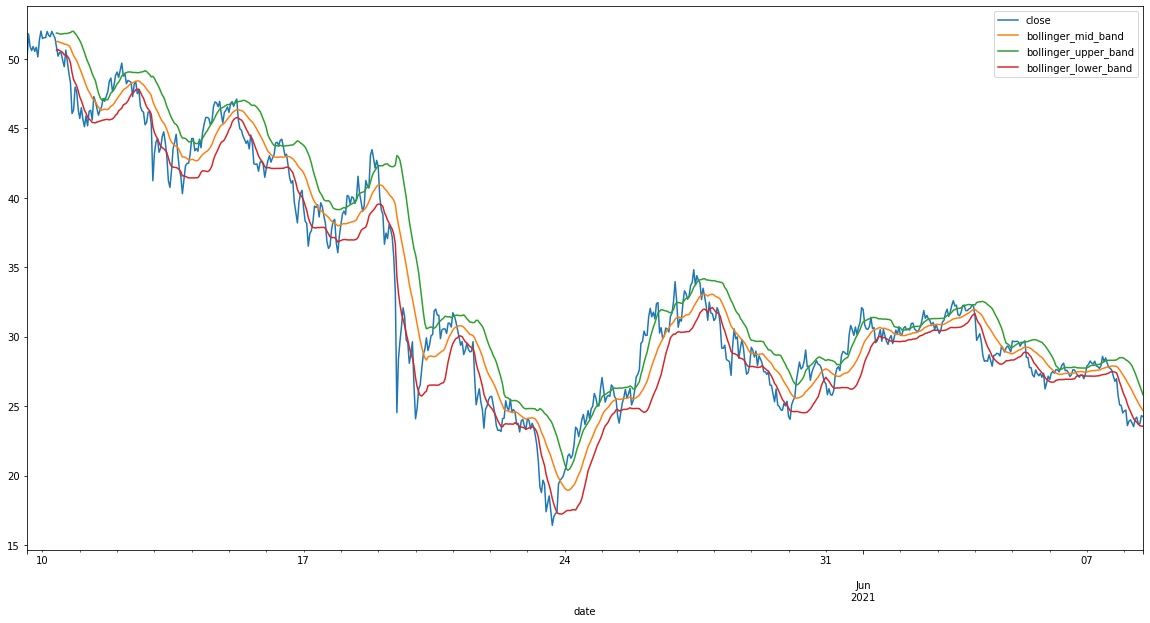

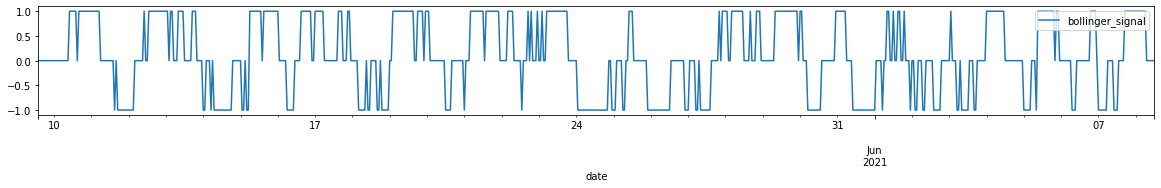

In [180]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
historical_prices_df[['bollinger_signal']].plot(figsize=(20,2))

### Build MACD Signals

In [124]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd

historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']

# Construct a conservative SELL signals
historical_prices_df['macd_diff_shift'] = historical_prices_df['macd_diff'].shift(1)
historical_prices_df['macd_diff_gradient'] = ( (historical_prices_df['macd_diff'] - historical_prices_df['macd_diff_shift']) / (historical_prices_df['macd_diff_shift']) )

historical_prices_df['macd_conservative_long_exit'] = np.where(historical_prices_df['macd_diff_gradient'] < 0, -1.0, 0.0)
historical_prices_df['macd_conservative_short_exit'] = np.where(historical_prices_df['macd_diff_gradient'] > 0, 1.0, 0.0)


mac_list = ['close', 'mac_fast_12', 'mac_slow_26', 'macd', 'mac_signal_line_9ema', 'macd_diff', 'macd_long', 'macd_short', 'macd_signal', 'macd_diff_shift', 'macd_diff_gradient', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[mac_list].iloc[50:100]

,close,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal,macd_diff_shift,macd_diff_gradient,macd_conservative_long_exit,macd_conservative_short_exit
date,,,,,,,,,,,,,
2021-05-11 16:00:00,46.94687,46.615209,47.147218,-0.532009,-0.785635,0.253626,1.0,0.0,1.0,0.240703,0.053689,0.0,1.0
2021-05-11 17:00:00,47.30236,46.720925,47.158710,-0.437785,-0.716065,0.278280,1.0,0.0,1.0,0.253626,0.097204,0.0,1.0
2021-05-11 18:00:00,47.62206,46.859561,47.193032,-0.333471,-0.639546,0.306075,1.0,0.0,1.0,0.278280,0.099882,0.0,1.0
2021-05-11 19:00:00,48.38680,47.094521,47.281460,-0.186939,-0.549025,0.362086,1.0,0.0,1.0,0.306075,0.182998,0.0,1.0
2021-05-11 20:00:00,48.61872,47.329013,47.380516,-0.051503,-0.449521,0.398018,1.0,0.0,1.0,0.362086,0.099235,0.0,1.0
2021-05-11 21:00:00,47.66812,47.381183,47.401820,-0.020637,-0.363744,0.343107,1.0,0.0,1.0,0.398018,-0.137960,-1.0,0.0
2021-05-11 22:00:00,48.07519,47.487954,47.451699,0.036254,-0.283744,0.319999,1.0,0.0,1.0,0.343107,-0.067351,-1.0,0.0
2021-05-11 23:00:00,48.80319,47.690298,47.551810,0.138488,-0.199298,0.337786,1.0,0.0,1.0,0.319999,0.055585,0.0,1.0
2021-05-12 00:00:00,49.05706,47.900569,47.663310,0.237259,-0.111986,0.349245,1.0,0.0,1.0,0.337786,0.033926,0.0,1.0


<AxesSubplot:xlabel='date'>

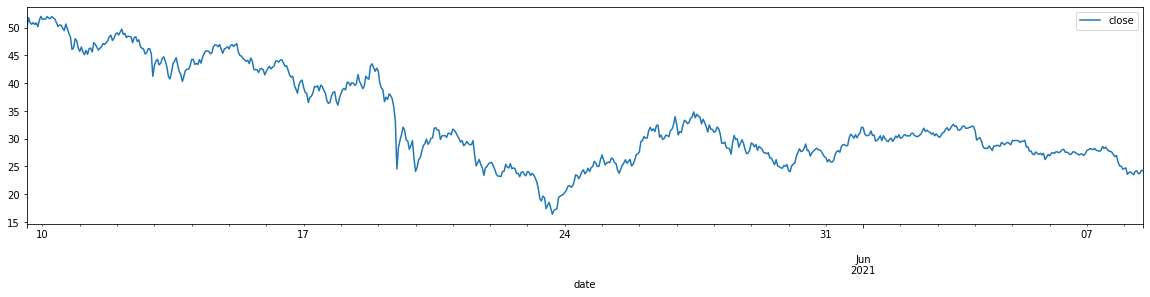

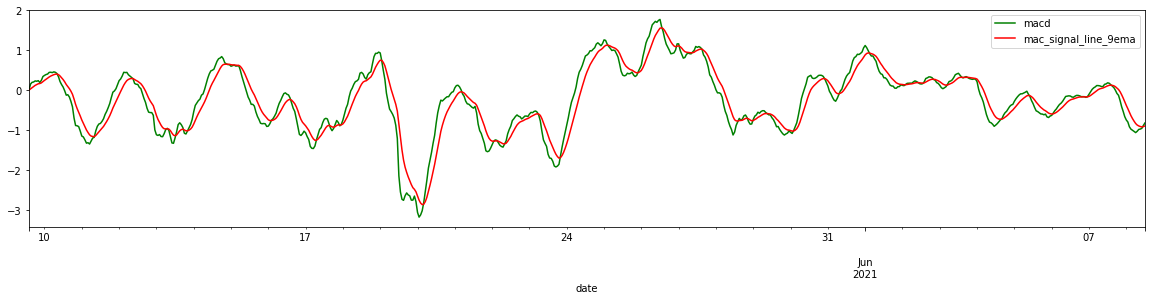

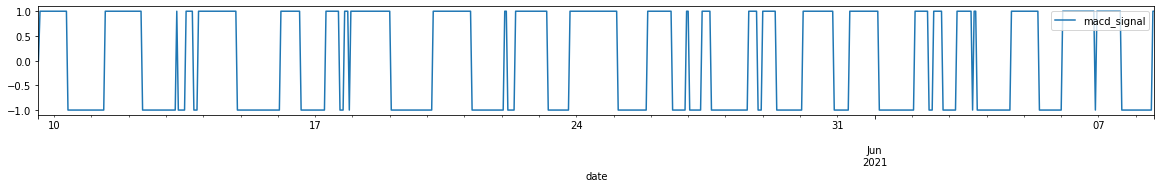

In [183]:
historical_prices_df[['close']].plot(figsize=(20,4))
historical_prices_df[['macd','mac_signal_line_9ema']].plot(figsize=(20,4), color=['g', 'r'])
historical_prices_df[['macd_signal']].plot(figsize=(20,2))

<AxesSubplot:xlabel='date'>

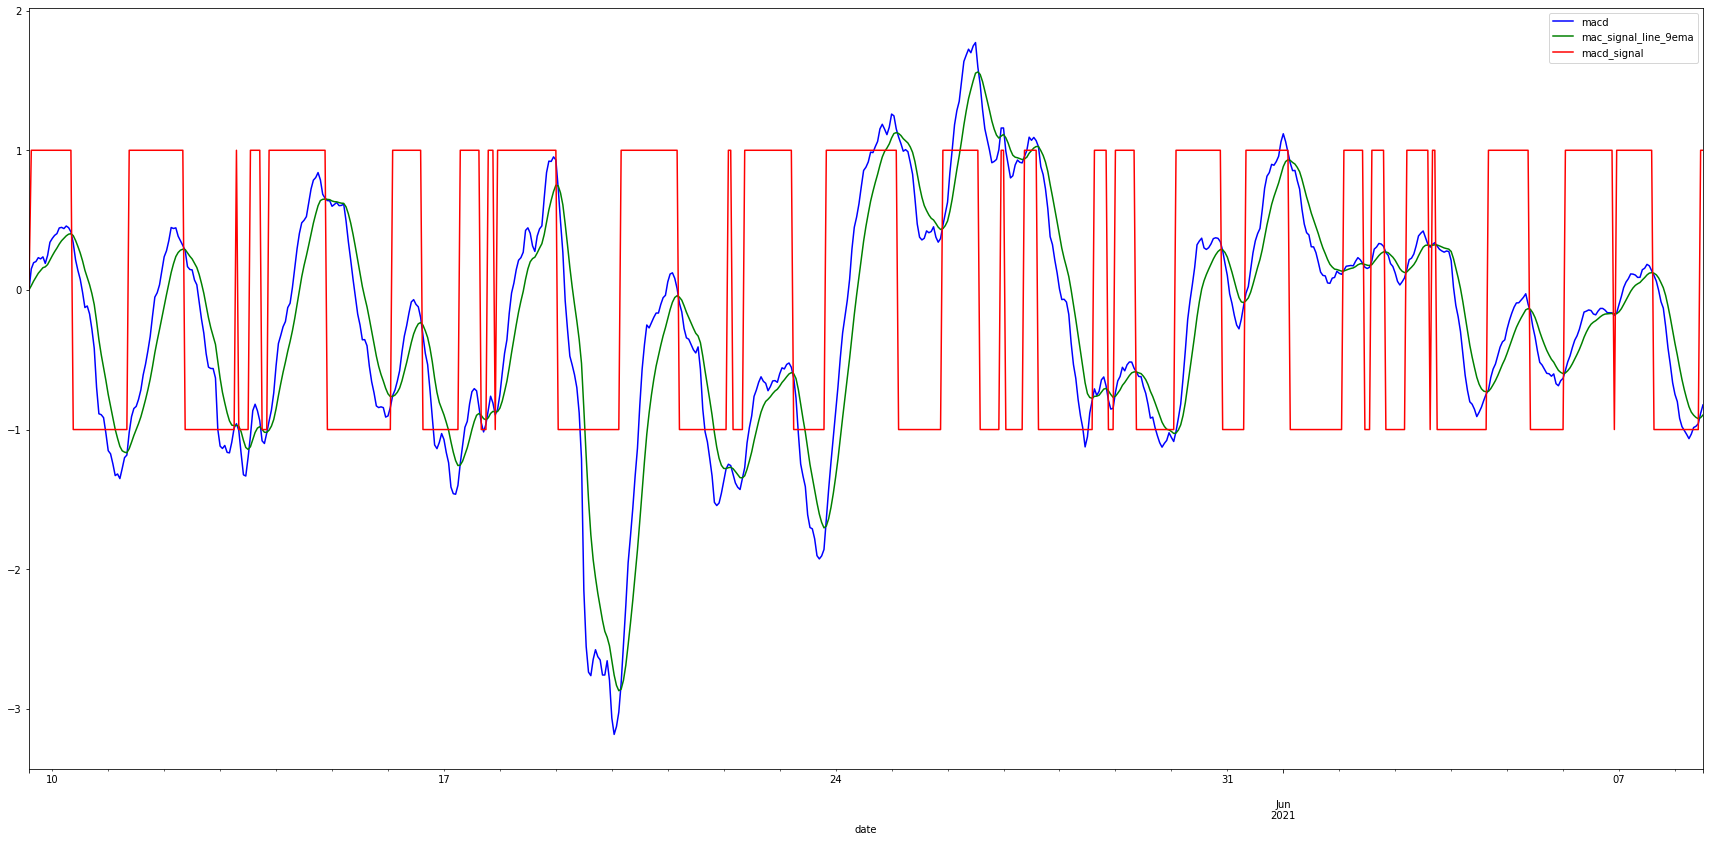

In [184]:
historical_prices_df[['macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(30,14), color=['b', 'g', 'r'])

### Build RSI Signals

In [127]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,macd_diff_gradient,macd_conservative_long_exit,macd_conservative_short_exit,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
date,,,,,,,,,,,,,,,,,,,,,
2021-05-09 14:00:00,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680,2021-05-09 14:00:00,0.022596,49.913650,49.913650,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-09 15:00:00,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918,2021-05-09 15:00:00,0.037823,50.893916,50.873941,...,inf,0.0,1.0,1.88787,1.88787,0.00000,NaN,NaN,NaN,NaN
2021-05-09 16:00:00,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910,2021-05-09 16:00:00,-0.017429,50.895632,50.882478,...,0.093853,0.0,1.0,-0.90283,0.00000,0.90283,NaN,NaN,NaN,NaN
2021-05-09 17:00:00,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726,2021-05-09 17:00:00,-0.005901,50.812518,50.807712,...,-0.148446,-1.0,0.0,-0.30034,0.00000,0.30034,NaN,NaN,NaN,NaN
2021-05-09 18:00:00,1620583200000,50.65753,51.30955,50.42594,50.88990,1794.841976,2021-05-09 18:00:00,0.005762,50.830465,50.825308,...,-0.003292,-1.0,0.0,0.29155,0.29155,0.00000,NaN,NaN,NaN,NaN


In [128]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[50:100]
# historical_prices_df.head()

,close,daily_return,rs,rsi_14,rsi_overbought,rsi_oversold
date,,,,,,
2021-05-11 16:00:00,46.94687,-0.003972,0.953022,48.797308,0.0,0.0
2021-05-11 17:00:00,47.30236,0.007572,1.039852,50.976832,0.0,0.0
2021-05-11 18:00:00,47.62206,0.006759,1.123946,52.917830,0.0,0.0
2021-05-11 19:00:00,48.38680,0.016059,1.340579,57.275521,0.0,0.0
2021-05-11 20:00:00,48.61872,0.004793,1.411330,58.529102,0.0,0.0
2021-05-11 21:00:00,47.66812,-0.019552,1.075460,51.817907,0.0,0.0
2021-05-11 22:00:00,48.07519,0.008540,1.185208,54.237772,0.0,0.0
2021-05-11 23:00:00,48.80319,0.015143,1.396579,58.273860,0.0,0.0
2021-05-12 00:00:00,49.05706,0.005202,1.475959,59.611609,0.0,0.0


In [129]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 15

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_periods', 'rsi_oversold_preceeding_periods'] # NEED TO ADD 'rsi_signal',


historical_prices_df['rsi_oversold_preceeding_periods'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_periods'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_periods'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_periods'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_periods',	'rsi_oversold_preceeding_periods',	'rsi_long',	'rsi_short',	'rsi_signal']
# display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[195:230])

,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_periods,rsi_oversold_preceeding_periods,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-17 17:00:00,0.532914,34.764753,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-17 18:00:00,0.753219,42.962061,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-17 19:00:00,0.873033,46.610663,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-17 20:00:00,0.895916,47.255057,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-17 21:00:00,0.645907,39.243217,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-17 22:00:00,0.572524,36.407950,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-17 23:00:00,0.777827,43.751559,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-18 00:00:00,0.932576,48.255588,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-18 01:00:00,1.080473,51.934005,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='date'>

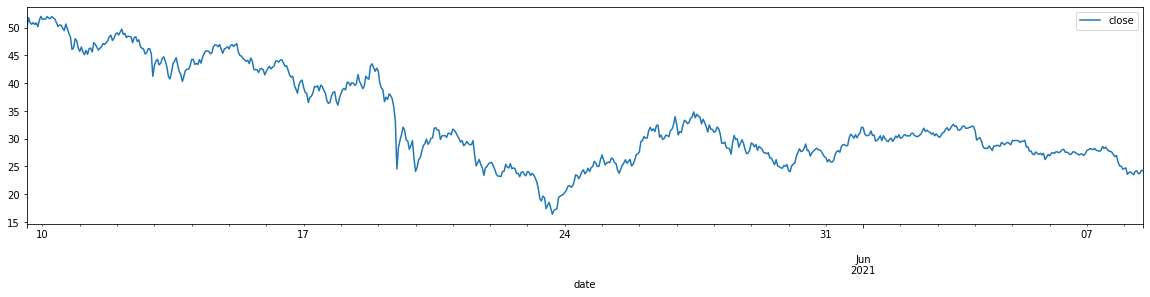

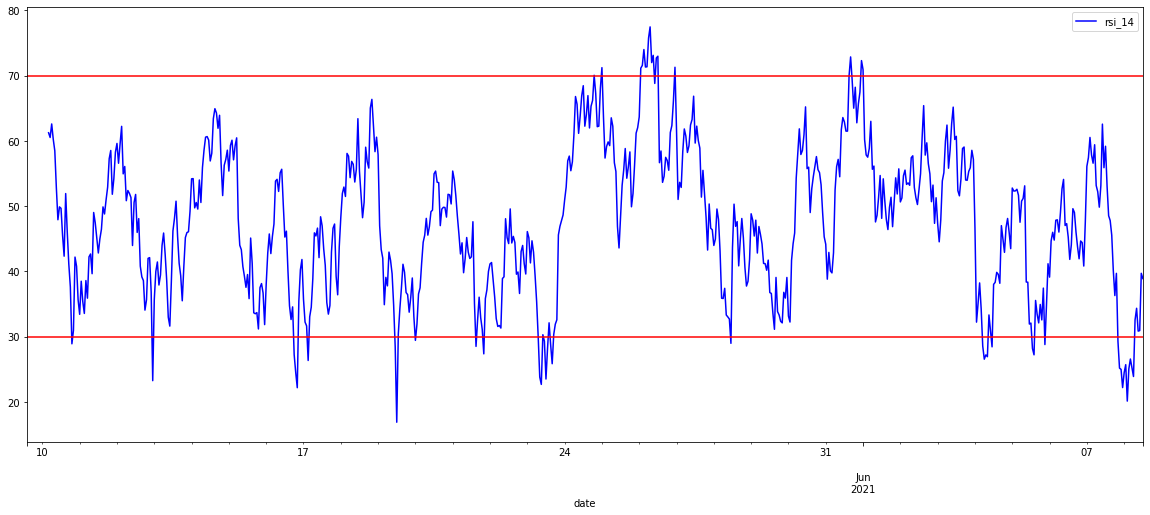

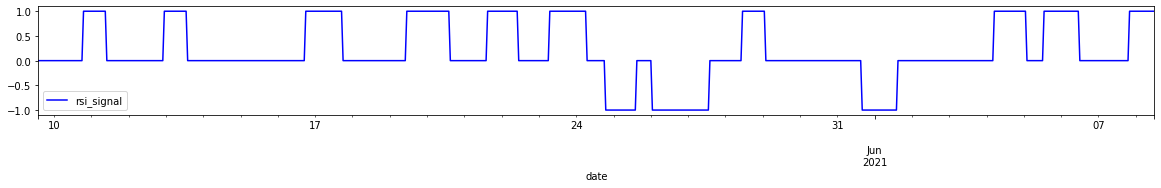

In [189]:
historical_prices_df[['close']].plot(figsize=(20,4))
historical_prices_df[['rsi_14']].plot(figsize=(20,8), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')
historical_prices_df[['rsi_signal']].plot(figsize=(20,2), color=['b'])

In [132]:
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,avg_loss,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_periods,rsi_overbought_preceeding_periods,rsi_short,rsi_long,rsi_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-09 14:00:00,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680,2021-05-09 14:00:00,0.022596,49.913650,49.913650,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-09 15:00:00,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918,2021-05-09 15:00:00,0.037823,50.893916,50.873941,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-09 16:00:00,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910,2021-05-09 16:00:00,-0.017429,50.895632,50.882478,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-09 17:00:00,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726,2021-05-09 17:00:00,-0.005901,50.812518,50.807712,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-09 18:00:00,1620583200000,50.65753,51.30955,50.42594,50.88990,1794.841976,2021-05-09 18:00:00,0.005762,50.830465,50.825308,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. MACHINE LEARNING COMPONENT

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [133]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [134]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal', 'bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal']
st3_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal']
st4_x_var_list = ['close', 'crossover_signal_50v200', 'crossover_signal_9v20']

## Strategy 1 - EMA50V200 + Bollinger

In [135]:
historical_prices_df[st1_x_var_list]

,close,crossover_signal_50v200,bollinger_signal,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band
date,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,NaN,NaN,NaN
2021-05-09 15:00:00,51.80152,1.0,0.0,NaN,NaN,NaN
2021-05-09 16:00:00,50.89869,1.0,0.0,NaN,NaN,NaN
2021-05-09 17:00:00,50.59835,1.0,0.0,NaN,NaN,NaN
2021-05-09 18:00:00,50.88990,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-06-08 08:00:00,24.20431,-1.0,0.0,25.449334,27.059516,23.839153
2021-06-08 09:00:00,23.71481,-1.0,0.0,25.230289,26.757354,23.703224
2021-06-08 10:00:00,23.71981,-1.0,0.0,25.027314,26.464906,23.589723


In [136]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]


# shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)

,close,crossover_signal_50v200,bollinger_signal,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_shift,bull_or_bear
date,,,,,,,,
2021-06-07 17:00:00,27.13928,-1.0,1.0,27.889050,28.298950,27.479149,0.0,Bear
2021-06-07 18:00:00,26.78390,-1.0,1.0,27.879571,28.313259,27.445884,1.0,Bear
2021-06-07 19:00:00,26.97757,-1.0,1.0,27.861755,28.325328,27.398183,1.0,Bear
2021-06-07 20:00:00,25.77915,-1.0,1.0,27.755582,28.412257,27.098907,1.0,Bear
2021-06-07 21:00:00,25.08813,-1.0,1.0,27.609765,28.492980,26.726550,1.0,Bear
2021-06-07 22:00:00,25.05191,-1.0,1.0,27.449963,28.487316,26.412610,1.0,Bear
2021-06-07 23:00:00,24.51449,-1.0,1.0,27.270534,28.484326,26.056743,1.0,Bear
2021-06-08 00:00:00,24.65069,-1.0,1.0,27.101280,28.433029,25.769531,1.0,Bear
2021-06-08 01:00:00,24.72041,-1.0,1.0,26.925499,28.329637,25.521361,1.0,Bear


In [137]:
# IF BULL, BOLLINGER == 0, BOLLINGER_SHIFT == 1,

## Program the Conditional Logic for the Trading Strategy

In [138]:
# IF BEAR + BOLLINGER BUY (1), Position = 0
# IF BEAR + BOLLINGER SELL (-1), Position = -1
# IF BULL + BOLLINGER BUY (1), Position = 1
# IF BULL + BOLLINGER SELL (-1), Position = 0

In [139]:
st1_position_code = 0
st1_positions = []

for index, row in strategy_1.iterrows():


    # BUY SIGNALS, ONLY ENTERING TRADE WHEN PRICE REENTERS FAIR TRADING ZONE
    
    # IF BEAR + BOLL (WAS JUST) == -1, EXIT SHORT (BUY OUT)
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
        st1_position_code = -1
        st1_positions.append(st1_position_code)
    
    
    # ELIF BULL + BOLL == 1 BUY
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
        st1_position_code = 1
        st1_positions.append(st1_position_code)  



    # EXIT SIGNALS. LESS CONDITIONS. SELL THE SECOND TRADING CONDITIONS AREN'T FAVOURABLE


    # ELIF BEAR + BOLL == 1, EXIT SHORT / NO POSITION
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] != 1):
        st1_position_code = 0
        st1_positions.append(st1_position_code)
    
    
    
    # ELIF BULL + BOLL == -1, EXIT LONG / NO POSITION
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == -1):
        st1_position_code = 0
        st1_positions.append(st1_position_code) 

    
    # ELSE : O / NA
    else:
        st1_position_code = st1_position_code
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")

# Double check the dataframes have the same row lengths
display(len(st1_positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 8)

(719, 51)

In [140]:
strategy_1['boll_ema50200_position'] = st1_positions
historical_prices_df['st1_boll_ema50200_position'] = st1_positions
# strategy_1[130:170]
strategy_1[695:830]

,close,crossover_signal_50v200,bollinger_signal,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_shift,bull_or_bear,boll_ema50200_position
date,,,,,,,,,
2021-06-07 13:00:00,28.09572,-1.0,0.0,27.816305,28.295240,27.337369,-1.0,Bear,-1
2021-06-07 14:00:00,27.77930,-1.0,0.0,27.844207,28.302460,27.385954,0.0,Bear,-1
2021-06-07 15:00:00,27.72525,-1.0,0.0,27.876299,28.299610,27.452988,0.0,Bear,-1
2021-06-07 16:00:00,27.56547,-1.0,0.0,27.892909,28.295680,27.490138,0.0,Bear,-1
2021-06-07 17:00:00,27.13928,-1.0,1.0,27.889050,28.298950,27.479149,0.0,Bear,0
2021-06-07 18:00:00,26.78390,-1.0,1.0,27.879571,28.313259,27.445884,1.0,Bear,0
2021-06-07 19:00:00,26.97757,-1.0,1.0,27.861755,28.325328,27.398183,1.0,Bear,0
2021-06-07 20:00:00,25.77915,-1.0,1.0,27.755582,28.412257,27.098907,1.0,Bear,0
2021-06-07 21:00:00,25.08813,-1.0,1.0,27.609765,28.492980,26.726550,1.0,Bear,0


In [141]:
strategy_1['boll_ema50200_position_shift'] = strategy_1['boll_ema50200_position'].shift(1)
strategy_1[50:100]

,close,crossover_signal_50v200,bollinger_signal,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_shift,bull_or_bear,boll_ema50200_position,boll_ema50200_position_shift
date,,,,,,,,,,
2021-05-11 16:00:00,46.94687,-1.0,0.0,46.385098,47.157128,45.613068,-1.0,Bear,-1,0.0
2021-05-11 17:00:00,47.30236,-1.0,-1.0,46.351459,47.062837,45.640082,0.0,Bear,-1,-1.0
2021-05-11 18:00:00,47.62206,-1.0,-1.0,46.350115,47.058932,45.641298,-1.0,Bear,-1,-1.0
2021-05-11 19:00:00,48.38680,-1.0,-1.0,46.452499,47.294936,45.610061,-1.0,Bear,-1,-1.0
2021-05-11 20:00:00,48.61872,-1.0,-1.0,46.598261,47.549462,45.647061,-1.0,Bear,-1,-1.0
2021-05-11 21:00:00,47.66812,-1.0,-1.0,46.657219,47.637390,45.677048,-1.0,Bear,-1,-1.0
2021-05-11 22:00:00,48.07519,-1.0,-1.0,46.778796,47.777260,45.780333,-1.0,Bear,-1,-1.0
2021-05-11 23:00:00,48.80319,-1.0,-1.0,46.962913,47.978920,45.946905,-1.0,Bear,-1,-1.0
2021-05-12 00:00:00,49.05706,-1.0,-1.0,47.120914,48.205815,46.036013,-1.0,Bear,-1,-1.0


In [142]:
st1_signal_text = 'No Position - hold'
st1_signals = []

for index, row in strategy_1.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short'
        st1_signals.append(st1_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Close Long'
        st1_signals.append(st1_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'No Position - hold'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Sell Short'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Hold Short Position'
        st1_signals.append(st1_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = '‘Close Long Position, Enter short Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Hold Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short Position, Enter Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Enter Long Position'
        st1_signals.append(st1_signal_text)


    # Else, Signal = none
    else:
        st1_signal_text = st1_signal_text
        st1_signals.append(st1_signal_text)


strategy_1['boll_ema50200_signals'] = st1_signals
historical_prices_df['st1_boll_ema50200_signals'] = st1_signals
strategy_1[300:350]

,close,crossover_signal_50v200,bollinger_signal,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_shift,bull_or_bear,boll_ema50200_position,boll_ema50200_position_shift,boll_ema50200_signals
date,,,,,,,,,,,
2021-05-22 02:00:00,25.10623,-1.0,0.0,26.661824,28.644604,24.679044,0.0,Bear,0,0.0,No Position - hold
2021-05-22 03:00:00,24.47296,-1.0,0.0,26.449740,28.428234,24.471246,0.0,Bear,0,0.0,No Position - hold
2021-05-22 04:00:00,23.59496,-1.0,1.0,26.178185,28.157178,24.199192,0.0,Bear,0,0.0,No Position - hold
2021-05-22 05:00:00,23.25600,-1.0,1.0,25.865985,27.784965,23.947005,1.0,Bear,0,0.0,No Position - hold
2021-05-22 06:00:00,23.27434,-1.0,1.0,25.575321,27.419445,23.731196,1.0,Bear,0,0.0,No Position - hold
2021-05-22 07:00:00,23.17507,-1.0,1.0,25.288666,27.030186,23.547145,1.0,Bear,0,0.0,No Position - hold
2021-05-22 08:00:00,24.10550,-1.0,0.0,25.046899,26.577595,23.516203,1.0,Bear,0,0.0,No Position - hold
2021-05-22 09:00:00,24.13861,-1.0,0.0,24.771650,25.864636,23.678664,0.0,Bear,0,0.0,No Position - hold
2021-05-22 10:00:00,25.38891,-1.0,0.0,24.683858,25.637880,23.729836,0.0,Bear,0,0.0,No Position - hold


In [143]:
historical_prices_df.head(4)

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_periods,rsi_overbought_preceeding_periods,rsi_short,rsi_long,rsi_signal,st1_boll_ema50200_position,st1_boll_ema50200_signals
date,,,,,,,,,,,,,,,,,,,,,
2021-05-09 14:00:00,1620568800000,48.86427,49.91365,48.75978,49.91365,1307.732680,2021-05-09 14:00:00,0.022596,49.913650,49.913650,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,No Position - hold
2021-05-09 15:00:00,1620572400000,49.86212,51.80152,49.79133,51.80152,2582.096918,2021-05-09 15:00:00,0.037823,50.893916,50.873941,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,No Position - hold
2021-05-09 16:00:00,1620576000000,51.86890,52.31117,50.75032,50.89869,4851.980910,2021-05-09 16:00:00,-0.017429,50.895632,50.882478,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,No Position - hold
2021-05-09 17:00:00,1620579600000,50.78164,51.04909,50.38189,50.59835,762.838726,2021-05-09 17:00:00,-0.005901,50.812518,50.807712,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,No Position - hold


In [144]:
strategy_1['st1_boll_ema50200_long_closes'] = np.where(strategy_1['boll_ema50200_position'] == 1, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_no_posn_closes'] = np.where(strategy_1['boll_ema50200_position'] == 0, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_short_closes'] = np.where(strategy_1['boll_ema50200_position'] == -1, strategy_1['close'], np.nan)
# strategy_1[0:50]
strategy_1.head()

,close,crossover_signal_50v200,bollinger_signal,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_shift,bull_or_bear,boll_ema50200_position,boll_ema50200_position_shift,boll_ema50200_signals,st1_boll_ema50200_long_closes,st1_boll_ema50200_no_posn_closes,st1_boll_ema50200_short_closes
date,,,,,,,,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,NaN,NaN,NaN,NaN,Bull,0,NaN,No Position - hold,NaN,49.91365,NaN
2021-05-09 15:00:00,51.80152,1.0,0.0,NaN,NaN,NaN,0.0,Bull,0,0.0,No Position - hold,NaN,51.80152,NaN
2021-05-09 16:00:00,50.89869,1.0,0.0,NaN,NaN,NaN,0.0,Bull,0,0.0,No Position - hold,NaN,50.89869,NaN
2021-05-09 17:00:00,50.59835,1.0,0.0,NaN,NaN,NaN,0.0,Bull,0,0.0,No Position - hold,NaN,50.59835,NaN
2021-05-09 18:00:00,50.88990,1.0,0.0,NaN,NaN,NaN,0.0,Bull,0,0.0,No Position - hold,NaN,50.88990,NaN


In [145]:
# ______ BUILD MAIN GRAPH __________________ ##

# Visualize close price for the investment
price_closes = historical_prices_df[['close']].hvplot(
    line_color='gray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_1['st1_boll_ema50200_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_1['st1_boll_ema50200_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_1['st1_boll_ema50200_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ BUILD BB COMPONENTS __________________ ##


bb_upper = strategy_1['bollinger_upper_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_mid = strategy_1['bollinger_mid_band'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = strategy_1['bollinger_lower_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_signal = strategy_1['bollinger_signal'].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)


# ______ BUILD EMA50V200 COMPONENTS __________________ ##

ema50v200 = strategy_1['crossover_signal_50v200'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ CALL PLOTS __________________ ##

# Overlay plots
# entry_st1_exit_plot = price_closes * st1_entry * st1_no_posn * st1_exit
entry_st1_exit_plot = price_closes * long_closes* noposn_closes* short_closes
bb_plot = price_closes * bb_upper * bb_mid * bb_lower 

display(entry_st1_exit_plot.opts(xaxis=None))
# display(bb_plot.opts(xaxis=None))
display(bb_signal.opts(xaxis=None))
display(ema50v200.opts(xaxis=None))


# historical_prices_df.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                                :Curve   [date]   (close)
   .Curve.St1_boll_ema50200_long_closes    :Curve   [date]   (st1_boll_ema50200_long_closes)
   .Curve.St1_boll_ema50200_no_posn_closes :Curve   [date]   (st1_boll_ema50200_no_posn_closes)
   .Curve.St1_boll_ema50200_short_closes   :Curve   [date]   (st1_boll_ema50200_short_closes)

:Curve   [date]   (bollinger_signal)

:Curve   [date]   (crossover_signal_50v200)

## Strategy 2 - RSI + MACD

In [146]:
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal', 'macd_conservative_long_exit', 'macd_conservative_short_exit']

historical_prices_df[st2_x_var_list].head(20)

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit
date,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,0.0,0.0
2021-05-09 15:00:00,51.80152,0.0,1.0,0.0,1.0
2021-05-09 16:00:00,50.89869,0.0,1.0,0.0,1.0
2021-05-09 17:00:00,50.59835,0.0,1.0,-1.0,0.0
2021-05-09 18:00:00,50.88990,0.0,1.0,-1.0,0.0
2021-05-09 19:00:00,50.54297,0.0,1.0,-1.0,0.0
2021-05-09 20:00:00,50.84000,0.0,1.0,-1.0,0.0
2021-05-09 21:00:00,50.14513,0.0,1.0,-1.0,0.0
2021-05-09 22:00:00,51.35348,0.0,1.0,0.0,1.0


In [147]:
# Filter by x-variable list
strategy_2 = historical_prices_df[st2_x_var_list]

# Define long and short position conditions

environment = 'none'
environments = []

for index, row in strategy_2.iterrows():

    # If RSI signal == 1, OVERSOLD. I.e. enter long position
    if (row['rsi_signal'] == 1):
        environment = "Oversold. LONG!"
        environments.append(environment)
    
    # If RSI signal == -1, OVERBOUGHT. I.e. enter short position
    elif (row['rsi_signal'] == -1):
        environment = "Overbought. SELL!"
        environments.append(environment)
    
    # Else, price is fair
    else:
        environment = "Fair price"
        environments.append(environment)

display(len(environments))
display(strategy_2.shape)
display(historical_prices_df.shape)


719

(719, 5)

(719, 53)

In [148]:
strategy_2['rsi_window'] = environments
# historical_prices_df['rsi_window'] = environments
# strategy_2[130:170]
strategy_2[50:100]

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window
date,,,,,,
2021-05-11 16:00:00,46.94687,0.0,1.0,0.0,1.0,Fair price
2021-05-11 17:00:00,47.30236,0.0,1.0,0.0,1.0,Fair price
2021-05-11 18:00:00,47.62206,0.0,1.0,0.0,1.0,Fair price
2021-05-11 19:00:00,48.38680,0.0,1.0,0.0,1.0,Fair price
2021-05-11 20:00:00,48.61872,0.0,1.0,0.0,1.0,Fair price
2021-05-11 21:00:00,47.66812,0.0,1.0,-1.0,0.0,Fair price
2021-05-11 22:00:00,48.07519,0.0,1.0,-1.0,0.0,Fair price
2021-05-11 23:00:00,48.80319,0.0,1.0,0.0,1.0,Fair price
2021-05-12 00:00:00,49.05706,0.0,1.0,0.0,1.0,Fair price


In [149]:
# CREATE A MACD SIGNAL SHIFT 
strategy_2['macd_signal_shift'] = strategy_2['macd_signal'].shift(1)
strategy_2.head()

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift
date,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,0.0,0.0,Fair price,NaN
2021-05-09 15:00:00,51.80152,0.0,1.0,0.0,1.0,Fair price,0.0
2021-05-09 16:00:00,50.89869,0.0,1.0,0.0,1.0,Fair price,1.0
2021-05-09 17:00:00,50.59835,0.0,1.0,-1.0,0.0,Fair price,1.0
2021-05-09 18:00:00,50.88990,0.0,1.0,-1.0,0.0,Fair price,1.0


### Program the Conditional Logic for the Trading Strategy

### Aggresive Macd. i.e hold until the next macd cross

In [150]:
st2_position_code = 0
st2_positions = []

for index, row in strategy_2.iterrows():


    ## RSI OVERSOLD SCENARIOS


    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL (1), BUY
    if (row['rsi_signal'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 1
        st2_positions.append(st2_position_code)

    
    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    


    ## RSI OVERBOUGHT SCENARIOS


    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = -1
        st2_positions.append(st2_position_code)
    
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL (1), BUY
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)



    ## RSI FAIR SCENARIOS


    # # IF RSI == FAIR (0) AND MACD GOES FROM 1 to -1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    
    # # IF RSI == FAIR (0) AND MACD GOES FROM -1 to 1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)


    ## OTHER



    # ELSE : 0 / NA
    else:
        st2_position_code = st2_position_code
        st2_positions.append(st2_position_code)


display(len(st2_positions))
display(strategy_2.shape)
display(historical_prices_df.shape)

719

(719, 7)

(719, 53)

In [151]:
strategy_2['rsi_macd_agg_position'] = st2_positions
historical_prices_df['st2_rsi_macd_agg_position'] = st2_positions
# strategy_2[130:170]
# strategy_2[400:450]
strategy_2.head()

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position
date,,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,0.0,0.0,Fair price,NaN,0
2021-05-09 15:00:00,51.80152,0.0,1.0,0.0,1.0,Fair price,0.0,0
2021-05-09 16:00:00,50.89869,0.0,1.0,0.0,1.0,Fair price,1.0,0
2021-05-09 17:00:00,50.59835,0.0,1.0,-1.0,0.0,Fair price,1.0,0
2021-05-09 18:00:00,50.88990,0.0,1.0,-1.0,0.0,Fair price,1.0,0


In [152]:
strategy_2['rsi_macd_agg_position_shift'] = strategy_2['rsi_macd_agg_position'].shift(1)
# strategy_2[50:100]
strategy_2.head()

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position,rsi_macd_agg_position_shift
date,,,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,0.0,0.0,Fair price,NaN,0,NaN
2021-05-09 15:00:00,51.80152,0.0,1.0,0.0,1.0,Fair price,0.0,0,0.0
2021-05-09 16:00:00,50.89869,0.0,1.0,0.0,1.0,Fair price,1.0,0,0.0
2021-05-09 17:00:00,50.59835,0.0,1.0,-1.0,0.0,Fair price,1.0,0,0.0
2021-05-09 18:00:00,50.88990,0.0,1.0,-1.0,0.0,Fair price,1.0,0,0.0


In [153]:
st2_signal = 'NA'
st2_signal_text = 'No Position - hold'
st2_signals = []

for index, row in strategy_2.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short'
        st2_signals.append(st2_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Close Long'
        st2_signals.append(st2_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'No Position - hold'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Sell Short'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Hold Short Position'
        st2_signals.append(st2_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = '‘Close Long Position, Enter short Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Hold Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short Position, Enter Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Enter Long Position'
        st2_signals.append(st2_signal_text)


    # Else, Signal = none
    else:
        st2_signal_text = st2_signal_text
        st2_signals.append(st2_signal_text)


strategy_2['rsi_macd_agg_signals'] = st2_signals
historical_prices_df['st2_rsi_macd_agg_signals'] = st2_signals
strategy_2.head()

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position,rsi_macd_agg_position_shift,rsi_macd_agg_signals
date,,,,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,0.0,0.0,Fair price,NaN,0,NaN,No Position - hold
2021-05-09 15:00:00,51.80152,0.0,1.0,0.0,1.0,Fair price,0.0,0,0.0,No Position - hold
2021-05-09 16:00:00,50.89869,0.0,1.0,0.0,1.0,Fair price,1.0,0,0.0,No Position - hold
2021-05-09 17:00:00,50.59835,0.0,1.0,-1.0,0.0,Fair price,1.0,0,0.0,No Position - hold
2021-05-09 18:00:00,50.88990,0.0,1.0,-1.0,0.0,Fair price,1.0,0,0.0,No Position - hold


In [154]:
# st2_long_position_closes = []
# st2_no_position_closes = []
# st2_short_position_closes = []

# st2_long_position_close = np.nan
# st2_no_position_close = np.nan
# st2_short_position_close = np.nan

# for index, row in strategy_2.iterrows():

#     # LONG / Position == 1, close = green
#     if (row['rsi_macd_agg_position'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)

#     # LONG / Position != 1 & Position_shift == 1, close = green
#     elif (row['rsi_macd_agg_position'] != 1) & (row['rsi_macd_agg_position_shift'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)


#     # NOPOSN / Position == 0, close = blue
#     elif (row['rsi_macd_agg_position'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # NOPOSN / Position != 0 & Position_shift == 0, close = blue
#     elif (row['rsi_macd_agg_position'] != 0) & (row['rsi_macd_agg_position_shift'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # SHORT / Position == -1, close = red
#     if (row['rsi_macd_agg_position'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


#     # SHORT / Position != -1 & Position_shift == -1, close = blue
#     elif (row['rsi_macd_agg_position'] != -1) & (row['rsi_macd_agg_position_shift'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


# strategy_2['rsi_macd_long_closes'] = st2_long_position_closes
# strategy_2['rsi_macd_no_posn_closes'] = st2_no_position_closes
# strategy_2['rsi_macd_short_closes'] = st2_short_position_closes


strategy_2['rsi_macd_long_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 1, strategy_2['close'], np.nan)
strategy_2['rsi_macd_no_posn_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 0, strategy_2['close'], np.nan)
strategy_2['rsi_macd_short_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == -1, strategy_2['close'], np.nan)
strategy_2[50:100]

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position,rsi_macd_agg_position_shift,rsi_macd_agg_signals,rsi_macd_long_closes,rsi_macd_no_posn_closes,rsi_macd_short_closes
date,,,,,,,,,,,,,
2021-05-11 16:00:00,46.94687,0.0,1.0,0.0,1.0,Fair price,1.0,1,1.0,Hold Long Position,46.94687,NaN,NaN
2021-05-11 17:00:00,47.30236,0.0,1.0,0.0,1.0,Fair price,1.0,1,1.0,Hold Long Position,47.30236,NaN,NaN
2021-05-11 18:00:00,47.62206,0.0,1.0,0.0,1.0,Fair price,1.0,1,1.0,Hold Long Position,47.62206,NaN,NaN
2021-05-11 19:00:00,48.38680,0.0,1.0,0.0,1.0,Fair price,1.0,1,1.0,Hold Long Position,48.38680,NaN,NaN
2021-05-11 20:00:00,48.61872,0.0,1.0,0.0,1.0,Fair price,1.0,1,1.0,Hold Long Position,48.61872,NaN,NaN
2021-05-11 21:00:00,47.66812,0.0,1.0,-1.0,0.0,Fair price,1.0,1,1.0,Hold Long Position,47.66812,NaN,NaN
2021-05-11 22:00:00,48.07519,0.0,1.0,-1.0,0.0,Fair price,1.0,1,1.0,Hold Long Position,48.07519,NaN,NaN
2021-05-11 23:00:00,48.80319,0.0,1.0,0.0,1.0,Fair price,1.0,1,1.0,Hold Long Position,48.80319,NaN,NaN
2021-05-12 00:00:00,49.05706,0.0,1.0,0.0,1.0,Fair price,1.0,1,1.0,Hold Long Position,49.05706,NaN,NaN


In [155]:
## BUILDING CODE FOR MAIN GRAPH __________________________________________

# # Visualize st2_exit position relative to close price
# st2_exit = strategy_2[strategy_2['rsi_macd_agg_position'] == -1.0]['close'].hvplot.scatter(
#     color='red',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_no_posn = strategy_2[strategy_2['rsi_macd_agg_position'] == 0]['close'].hvplot.scatter(
#     color='BLUE',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_entry = strategy_2[strategy_2['rsi_macd_agg_position'] == 1.0]['close'].hvplot.scatter(
#     color='green',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# Visualize close price for the investment
price_closes = strategy_2[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_2['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_2['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_2['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize moving averages
# moving_avgs = strategy_2[['SMA50', 'SMA100']].hvplot(
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

## CODE FOR SIGNALS GRAPHS __________________________________________



rsi_signals = historical_prices_df['rsi_signal'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_signals = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

## CODE FOR DISPLAYING ALL GRAPHS __________________________________________

# Overlay plots
# entry_st2_exit_plot = price_closes * st2_entry * st2_no_posn * st2_exit * long_closes * noposn_closes * short_closes
entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))

display(rsi_signals.opts(xaxis=None))
display(macd_signals.opts(xaxis=None))




# strategy_2.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (rsi_signal)

:Curve   [date]   (macd_signal)

## Strategy 3 - EMA50V200 + MACD

In [156]:
historical_prices_df[st3_x_var_list].iloc[550:570]
historical_prices_df.shape

(719, 55)

In [157]:
# Filter by x-variable list
strategy_3 = historical_prices_df[st3_x_var_list]

# Define long and short position conditions
strategy_3['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_3.iloc[509:528]
strategy_3['macd_signal_shift'] = strategy_3['macd_signal'].shift(1)

strategy_3.head(5)

,close,crossover_signal_50v200,macd_signal,bull_or_bear,macd_signal_shift
date,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,Bull,NaN
2021-05-09 15:00:00,51.80152,1.0,1.0,Bull,0.0
2021-05-09 16:00:00,50.89869,1.0,1.0,Bull,1.0
2021-05-09 17:00:00,50.59835,1.0,1.0,Bull,1.0
2021-05-09 18:00:00,50.88990,1.0,1.0,Bull,1.0


In [158]:
strategy_3.shape

(719, 5)

## Program the Conditional Logic for the Trading Strategy

In [159]:
st3_position_code = 0
st3_positions = []

for index, row in strategy_3.iterrows():
    
    # If EMA50v200 = 1 (BULL) and MACD CROSSES ABOVE SIGNAL (1) BUY
    if (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 1
        st3_positions.append(st3_position_code)


    # If EMA50v200 = 1 (BULL) and MACD CROSSES BELOW SIGNAL (-1) No Position
    elif (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)


    # If EMA50v200 = -1 (BEAR) and MACD CROSSES ABOVE SIGNAL (1) No Position
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)



    # If EMA50v200 = -1 (BEAR) and MACD CROSSES BELOW SIGNAL (-1) SELL
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = -1
        st3_positions.append(st3_position_code)


    # ELSE : 0 / NA
    else:
        st3_position_code = st3_position_code
        st3_positions.append(st3_position_code)

    

# Double check the dataframes have the same row lengths
display(len(st3_positions))
display(strategy_3.shape)
display(historical_prices_df.shape)    

719

(719, 5)

(719, 55)

In [160]:
strategy_3['ema50200_macd_position'] = st3_positions
historical_prices_df['st3_ema50200_macd_position'] = st3_positions
strategy_3.head()

,close,crossover_signal_50v200,macd_signal,bull_or_bear,macd_signal_shift,ema50200_macd_position
date,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,Bull,NaN,0
2021-05-09 15:00:00,51.80152,1.0,1.0,Bull,0.0,1
2021-05-09 16:00:00,50.89869,1.0,1.0,Bull,1.0,1
2021-05-09 17:00:00,50.59835,1.0,1.0,Bull,1.0,1
2021-05-09 18:00:00,50.88990,1.0,1.0,Bull,1.0,1


### CALCULATE SIGNALS

In [161]:
strategy_3['ema50200_macd_position_shift'] = strategy_3['ema50200_macd_position'].shift(1)
strategy_3

,close,crossover_signal_50v200,macd_signal,bull_or_bear,macd_signal_shift,ema50200_macd_position,ema50200_macd_position_shift
date,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,Bull,NaN,0,NaN
2021-05-09 15:00:00,51.80152,1.0,1.0,Bull,0.0,1,0.0
2021-05-09 16:00:00,50.89869,1.0,1.0,Bull,1.0,1,1.0
2021-05-09 17:00:00,50.59835,1.0,1.0,Bull,1.0,1,1.0
2021-05-09 18:00:00,50.88990,1.0,1.0,Bull,1.0,1,1.0
...,...,...,...,...,...,...,...
2021-06-08 08:00:00,24.20431,-1.0,-1.0,Bear,-1.0,-1,-1.0
2021-06-08 09:00:00,23.71481,-1.0,-1.0,Bear,-1.0,-1,-1.0
2021-06-08 10:00:00,23.71981,-1.0,-1.0,Bear,-1.0,-1,-1.0


In [162]:
st3_signal_text = 'No Position - hold'
st3_signals = []

for index, row in strategy_3.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short'
        st3_signals.append(st3_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Close Long'
        st3_signals.append(st3_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'No Position - hold'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Sell Short'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Hold Short Position'
        st3_signals.append(st3_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = '‘Close Long Position, Enter short Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Hold Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short Position, Enter Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Enter Long Position'
        st3_signals.append(st3_signal_text)


    # Else, Signal = none
    else:
        st3_signal_text = st3_signal_text
        st3_signals.append(st3_signal_text)


strategy_3['ema50200_macd_signal'] = st3_signals
historical_prices_df['st3_rsi_macd_agg_signals'] = st3_signals
# strategy_3[0:50]
strategy_3.head()

,close,crossover_signal_50v200,macd_signal,bull_or_bear,macd_signal_shift,ema50200_macd_position,ema50200_macd_position_shift,ema50200_macd_signal
date,,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,Bull,NaN,0,NaN,No Position - hold
2021-05-09 15:00:00,51.80152,1.0,1.0,Bull,0.0,1,0.0,Enter Long Position
2021-05-09 16:00:00,50.89869,1.0,1.0,Bull,1.0,1,1.0,Hold Long Position
2021-05-09 17:00:00,50.59835,1.0,1.0,Bull,1.0,1,1.0,Hold Long Position
2021-05-09 18:00:00,50.88990,1.0,1.0,Bull,1.0,1,1.0,Hold Long Position


In [163]:
strategy_3['ema50v200_macd_long_closes'] = np.where(strategy_3['ema50200_macd_position'] == 1, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_no_posn_closes'] = np.where(strategy_3['ema50200_macd_position'] == 0, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_short_closes'] = np.where(strategy_3['ema50200_macd_position'] == -1, strategy_3['close'], np.nan)
# strategy_3[50:100]
strategy_3.head()

,close,crossover_signal_50v200,macd_signal,bull_or_bear,macd_signal_shift,ema50200_macd_position,ema50200_macd_position_shift,ema50200_macd_signal,ema50v200_macd_long_closes,ema50v200_macd_no_posn_closes,ema50v200_macd_short_closes
date,,,,,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,Bull,NaN,0,NaN,No Position - hold,NaN,49.91365,NaN
2021-05-09 15:00:00,51.80152,1.0,1.0,Bull,0.0,1,0.0,Enter Long Position,51.80152,NaN,NaN
2021-05-09 16:00:00,50.89869,1.0,1.0,Bull,1.0,1,1.0,Hold Long Position,50.89869,NaN,NaN
2021-05-09 17:00:00,50.59835,1.0,1.0,Bull,1.0,1,1.0,Hold Long Position,50.59835,NaN,NaN
2021-05-09 18:00:00,50.88990,1.0,1.0,Bull,1.0,1,1.0,Hold Long Position,50.88990,NaN,NaN


In [164]:

# _________________ BUILDING MAIN GRAPH YO _________________ #

# Visualize close price for the investment
price_closes = strategy_3[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_3['ema50v200_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_3['ema50v200_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_3['ema50v200_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ OTHER SIGNAL CODE _________________ #

ema50v200sig = historical_prices_df['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_sig = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ CALLING THE GRAPHS SON _________________ #

entry_st3_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st3_exit_plot.opts(xaxis=None))
display(ema50v200sig.opts(xaxis=None))
display(macd_sig.opts(xaxis=None))

:Overlay
   .Curve.I                             :Curve   [date]   (close)
   .Curve.Ema50v200_macd_long_closes    :Curve   [date]   (ema50v200_macd_long_closes)
   .Curve.Ema50v200_macd_no_posn_closes :Curve   [date]   (ema50v200_macd_no_posn_closes)
   .Curve.Ema50v200_macd_short_closes   :Curve   [date]   (ema50v200_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (macd_signal)

## Strategy 4 - EMA200v50 + EMA200v50

In [165]:
# Filter by x-variable list
strategy_4 = historical_prices_df[st4_x_var_list]

# Define long and short position conditions
strategy_4['ema50v200_bull_or_bear'] = np.where(strategy_4['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_4.iloc[509:528]
strategy_4.tail(5)

,close,crossover_signal_50v200,crossover_signal_9v20,ema50v200_bull_or_bear
date,,,,
2021-06-08 08:00:00,24.20431,-1.0,-1.0,Bear
2021-06-08 09:00:00,23.71481,-1.0,-1.0,Bear
2021-06-08 10:00:00,23.71981,-1.0,-1.0,Bear
2021-06-08 11:00:00,24.32365,-1.0,-1.0,Bear
2021-06-08 12:00:00,24.23244,-1.0,-1.0,Bear


## Program the Conditional Logic for the Trading Strategy

In [166]:
# Istantiate variables 
st4_position_code = 0
st4_positions = []

for index, row in strategy_4.iterrows():


    # IF BEAR (50v200 = -1) AND EMA9v20 = 1 : NO POSITION (Position = 0)
    if (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # IF BEAR (50v200 = -1) AND EMA9v20 = -1 : SHORT (Position = -1)
    elif (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = -1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = 1 : LONG (Position = 1)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = -1 : NO POSITION (Position = 0)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # ELSE
    else:
        st4_position_code = st4_position_code
        st4_positions.append(st4_position_code)

# Double check the dataframes have the same row lengths
display(len(st4_positions))
display(strategy_4.shape)
display(historical_prices_df.shape)

719

(719, 4)

(719, 57)

In [167]:
strategy_4['st4_ema200v50_ema9v20'] = st4_positions
historical_prices_df['st4_st4_ema200v50_ema9v20'] = st4_positions
# strategy_4[130:170]
strategy_4[695:830]

,close,crossover_signal_50v200,crossover_signal_9v20,ema50v200_bull_or_bear,st4_ema200v50_ema9v20
date,,,,,
2021-06-07 13:00:00,28.09572,-1.0,-1.0,Bear,-1
2021-06-07 14:00:00,27.77930,-1.0,-1.0,Bear,-1
2021-06-07 15:00:00,27.72525,-1.0,-1.0,Bear,-1
2021-06-07 16:00:00,27.56547,-1.0,-1.0,Bear,-1
2021-06-07 17:00:00,27.13928,-1.0,-1.0,Bear,-1
2021-06-07 18:00:00,26.78390,-1.0,-1.0,Bear,-1
2021-06-07 19:00:00,26.97757,-1.0,-1.0,Bear,-1
2021-06-07 20:00:00,25.77915,-1.0,-1.0,Bear,-1
2021-06-07 21:00:00,25.08813,-1.0,-1.0,Bear,-1


In [168]:
strategy_4['st4_ema200v50_ema9v20_shift'] = strategy_4['st4_ema200v50_ema9v20'].shift(1)
strategy_4.head(5)

,close,crossover_signal_50v200,crossover_signal_9v20,ema50v200_bull_or_bear,st4_ema200v50_ema9v20,st4_ema200v50_ema9v20_shift
date,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,Bull,0,NaN
2021-05-09 15:00:00,51.80152,1.0,1.0,Bull,1,0.0
2021-05-09 16:00:00,50.89869,1.0,1.0,Bull,1,1.0
2021-05-09 17:00:00,50.59835,1.0,1.0,Bull,1,1.0
2021-05-09 18:00:00,50.88990,1.0,1.0,Bull,1,1.0


In [169]:
st4_signal_text = 'No Position - hold'
st4_signals = []

for index, row in strategy_4.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short'
        st4_signals.append(st4_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Close Long'
        st4_signals.append(st4_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'No Position - hold'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Sell Short'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Hold Short Position'
        st4_signals.append(st4_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = '‘Close Long Position, Enter short Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Hold Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short Position, Enter Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Enter Long Position'
        st4_signals.append(st4_signal_text)


    # Else, Signal = none
    else:
        st4_signal_text = st4_signal_text
        st4_signals.append(st4_signal_text)


strategy_4['boll_ema50200_signals'] = st4_signals
historical_prices_df['st4_boll_ema50200_signals'] = st4_signals
# strategy_4[0:50]
strategy_4.head()

,close,crossover_signal_50v200,crossover_signal_9v20,ema50v200_bull_or_bear,st4_ema200v50_ema9v20,st4_ema200v50_ema9v20_shift,boll_ema50200_signals
date,,,,,,,
2021-05-09 14:00:00,49.91365,0.0,0.0,Bull,0,NaN,No Position - hold
2021-05-09 15:00:00,51.80152,1.0,1.0,Bull,1,0.0,Enter Long Position
2021-05-09 16:00:00,50.89869,1.0,1.0,Bull,1,1.0,Hold Long Position
2021-05-09 17:00:00,50.59835,1.0,1.0,Bull,1,1.0,Hold Long Position
2021-05-09 18:00:00,50.88990,1.0,1.0,Bull,1,1.0,Hold Long Position


In [172]:
strategy_4['rsi_macd_long_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 1, strategy_4['close'], np.nan)
strategy_4['rsi_macd_no_posn_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 0, strategy_4['close'], np.nan)
strategy_4['rsi_macd_short_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == -1, strategy_4['close'], np.nan)
strategy_4[50:100]


# ______________________ CODE FOR HV PLOTS MAIN GRAPH ______________________ #


# Visualize close price for the investment
price_closes = strategy_4[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_4['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_4['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_4['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______________________ OTHER SIGNALS CODE ______________________ #


em50v200sign = strategy_4['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

em9v20sign = strategy_4['crossover_signal_9v20'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)


# ______________________ CALL PLOTS ______________________ #

entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))
display(em50v200sign.opts(xaxis=None))
display(em9v20sign.opts(xaxis=None))


:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (crossover_signal_9v20)

In [59]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal
st1_boll_ema50200_position
st1_boll_ema50200_signals
st2_rsi_macd_agg_position
st2_rsi_macd_agg_signals
st3_ema50200_macd_position
st3_rsi_macd_agg_signals
st4_st4_ema200v50_ema9v20
st4_boll_ema50200_signals


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

### Shift the DataFrame Index by 1

In [ ]:
# historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
# historical_prices_df[x_var_list].tail()

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [ ]:
# # Drop NAs and replace positive/negative infinity values
# historical_prices_df.dropna(subset=x_var_list, inplace=True)
# historical_prices_df.dropna(subset=['daily_return'], inplace=True)
# historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
# historical_prices_df.head()

### Construct the Dependent Variable

In [ ]:
# historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
# historical_prices_df.head()

### Assign Training and Testing Windows